Name: Tsai, Yu-Yun

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
#(c)
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
#(d)
import statsmodels.api as sm
#(f)
from sklearn.preprocessing import PolynomialFeatures
#(h)
from sklearn.model_selection import train_test_split
#(i)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


1. Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

(a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant


In [2]:
ccpp = pd.read_excel('Folds5x2_pp.xlsx')
ccpp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

1. There are 9568 rows and 5 columns in the data set.
2. Independent Variable Columns: AT,V,AP,and RH.
    Dependent Variable Columns: PE

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

In [3]:
ccpp.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

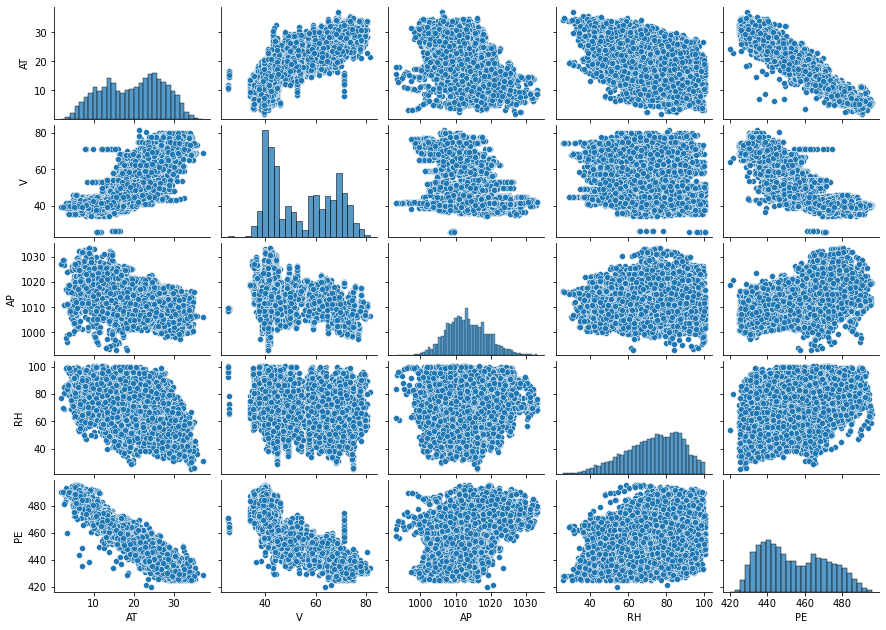

The relationship between AT and dependent variable PE is linear
The relationship between V and dependent variable PE is linear


In [4]:
#pairwise scatterplots
sns.pairplot(data = ccpp)
plt.subplots_adjust(top=0.7)
plt.show()
print("The relationship between AT and dependent variable PE is linear")
print("The relationship between V and dependent variable PE is linear")

iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
Mean = ccpp.mean()
Median = ccpp.median()
Range = ccpp.max() - ccpp.min()
#First quartile
Quantile_1 = ccpp.quantile(0.25)
#Thrid quantile
Quantile_3 = ccpp.quantile(0.75)
#Interquartile ranges
Interquartile = Quantile_3 - Quantile_1

In [6]:
#Summarize them in a table
summarize = pd.DataFrame() 
summarize = summarize.assign(Mean = Mean, Median = Median, Range = Range, First_Quantile = Quantile_1, 
                             Third_Quantile = Quantile_3, Interquartile = Interquartile)
summarize

,Mean,Median,Range,First_Quantile,Third_Quantile,Interquartile
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [7]:
#simple linear regression: AT
m_AT =  smf.ols(formula = 'PE ~ AT', data = ccpp).fit()
print(m_AT.summary())
print("\n")
print('p-value of AT is smaller than 0.05. AT is significant variable')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

In [8]:
prediction_AT = m_AT.predict(ccpp['AT'])

print('Prediction of AT : \n' ,prediction_AT)


Prediction of AT : 
 0       464.551173
1       442.360283
2       485.938675
3       451.740386
4       473.540438
           ...    
9563    460.881643
9564    468.394410
9565    429.028379
9566    443.880207
9567    450.133609
Length: 9568, dtype: float64


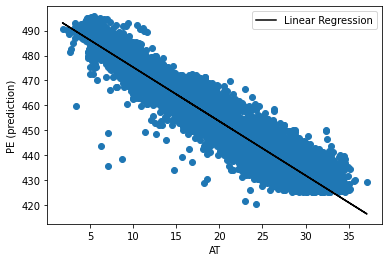

In [9]:
y = ccpp.iloc[:,4]
x_AT = ccpp['AT']

#create a scatter plot
plt.scatter(x_AT,y)
#create a linear regression line
plt.plot(x_AT,prediction_AT,color="black", label='Linear Regression')
plt.xlabel('AT')
plt.ylabel('PE (prediction)')
plt.legend()

In [10]:
#simple linear regression: V
m_V = smf.ols(formula = 'PE ~ V', data = ccpp).fit()
print(m_V.summary())
print("\n")
print('p-value of V is smaller than 0.05. V is significant variable')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

In [11]:
prediction_V = m_V.predict(ccpp['V'])

print('Prediction of V : \n' ,prediction_V)


Prediction of V : 
 0       469.020203
1       444.255739
2       471.777002
3       450.844021
4       473.996459
           ...    
9563    459.756892
9564    472.033992
9565    430.974042
9566    436.674542
9567    444.769718
Length: 9568, dtype: float64


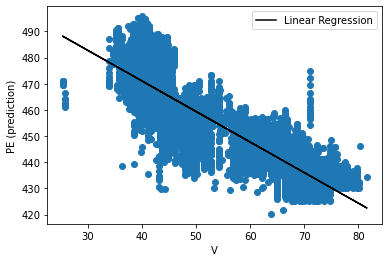

In [12]:
y = ccpp.iloc[:,4]
x_V = ccpp['V']

#create a scatter plot
plt.scatter(x_V,y)
#create a linear regression line
plt.plot(x_V,prediction_V,color="black", label='Linear Regression')
plt.xlabel('V')
plt.ylabel('PE (prediction)')
plt.legend()

In [13]:
#simple linear regression: AP
m_AP = smf.ols(formula = 'PE ~ AP', data = ccpp).fit()
print(m_AP.summary())
print("\n")
print('p-value of AP is smaller than 0.05. AP is significant variable')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

In [14]:
prediction_AP = m_AP.predict(ccpp['AP'])

print('Prediction of AP : \n' ,prediction_AP)


Prediction of AP : 
 0       470.471896
1       464.467713
2       452.727524
3       449.866970
4       448.362200
           ...    
9563    455.483787
9564    469.875947
9565    453.859826
9566    455.260306
9567    460.281173
Length: 9568, dtype: float64


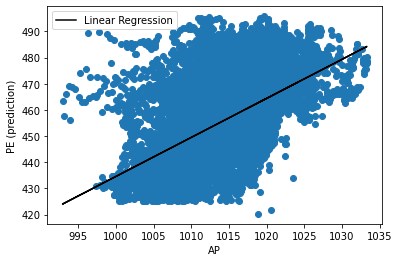

In [15]:
y = ccpp.iloc[:,4]
x_AP = ccpp['AP']

#create a scatter plot
plt.scatter(x_AP,y)
#create a linear regression line
plt.plot(x_AP,prediction_AP,color="black", label='Linear Regression')
plt.xlabel('AP')
plt.ylabel('PE (prediction)')
plt.legend()

In [16]:
#simple linear regression: RH
m_RH = smf.ols(formula = 'PE ~ RH', data = ccpp).fit()
print(m_RH.summary())
print("\n")
print('p-value of RH is smaller than 0.05. RH is significant variable')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:48:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

In [17]:
prediction_RH = m_RH.predict(ccpp['RH'])

print('Prediction of RH : \n' ,prediction_RH)


Prediction of RH : 
 0       454.301684
1       447.881574
2       462.945367
3       455.882790
4       464.986679
           ...    
9563    462.425925
9564    451.390080
9565    437.583882
9566    449.389776
9567    451.886739
Length: 9568, dtype: float64


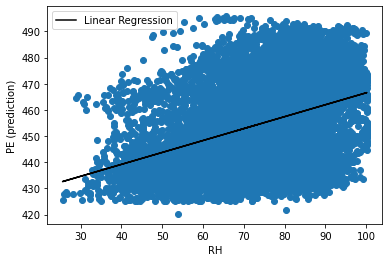

In [18]:
y = ccpp.iloc[:,4]
x_RH = ccpp['RH']

#create a scatter plot
plt.scatter(x_RH,y)
#create a linear regression line
plt.plot(x_RH,prediction_RH,color="black", label='Linear Regression')
plt.xlabel('RH')
plt.ylabel('PE (prediction)')
plt.legend()

In [19]:
#outlier test
y = ccpp.iloc[:,4]
variables = ['AT','V','AP','RH']
for i in range(len(variables)):
    outlier=[]
    x = ccpp.iloc[:,i]
    x = sm.add_constant(x.values)
    m3 = sm.OLS(y,x).fit()
    outliers = m3.outlier_test()
    outliers = outliers[outliers['bonf(p)'] < 0.05].index.values
    print('outliers of'  +variables[i]+':', outliers)
print('AT and V have outliers can be removed.')    

outliers ofAT: [3117 3383 3895 4218 7375 7398 7664 8187 8362]
outliers ofV: [3103]
outliers ofAP: []
outliers ofRH: []
AT and V have outliers can be removed.


(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

According to the results below, p-value of all predictors are smaller than 0.05, so we can reject the null hypothesis H0:βj =0.


In [20]:
df1 = ccpp
#variables
x_mul= df1.drop(columns='PE',axis=1)
x_mul= sm.add_constant(x_mul.values)
#response
y_mul= df1['PE']


#OLS
mols_mul = sm.OLS(y_mul,x_mul).fit()
prediction_mul = mols_mul.predict(x_mul)
print('Prediction of multiple regression: \n', prediction_mul)
#summarize 
mols_mul.summary()


Prediction of multiple regression: 
 [467.26978996 444.0773659  483.56264263 ... 432.40579787 443.03667582
 449.69603741]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
x1            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
x2            -0.2339      0.007    -32.122      0.000      -0.248      -0.220
x3             0.0621      0.009      6.564      0.000       0.044       0.081
x4            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
p_value = mols_mul.summary2().tables[1]['P>|t|']
p_value

const     0.000000e+00
x1        0.000000e+00
x2       4.375305e-215
x3        5.507109e-11
x4       3.104584e-293
Name: P>|t|, dtype: float64

Ans: According to the results above, p-value of all predictors are smaller than 0.05, so we can reject the null hypothesis H0:βj =0.

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


In [22]:
print(m_AT.params[1])
m_d = mols_mul.params[1:]
m_d

-2.1713199585178047


x1   -1.977513
x2   -0.233916
x3    0.062083
x4   -0.158054
dtype: float64

Text(0, 0.5, 'Coefficients of Multiple Regression')

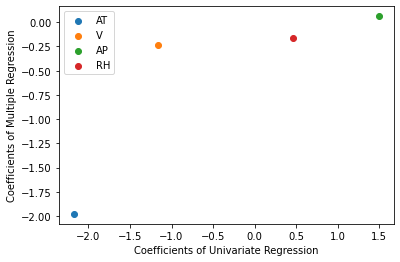

In [23]:
AT_coef = m_AT.params[1]
V_coef = m_V.params[1]
AP_coef = m_AP.params[1]
RH_coef = m_RH.params[1]


uni_coef = [AT_coef, V_coef, AP_coef, RH_coef] 
mul_coef = m_d
columns = ['AT', 'V', 'AP', 'RH'] 

for i,variable in enumerate(columns):
     plt.scatter(uni_coef[i],mul_coef[i],label=variable)
        
plt.legend(loc="upper left")
plt.xlabel("Coefficients of Univariate Regression")
plt.ylabel("Coefficients of Multiple Regression")
#plt.grid()


In [24]:
#table of prediction(Univariate and Multiple)
columns = ['AT', 'V', 'AP', 'RH']
table_regres = pd.DataFrame()
table_regres = table_regres.assign(Variables=columns, Univariate = uni_coef, Multiple = list(mul_coef))
table_regres 

,Variables,Univariate,Multiple
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =β0 +β1X+β2X2 +β3X3 +ε

Ans: Yes, there is evidence of nonlinear association between any of the predictors and the response. See the data below.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#Polynomial Features : AT
xpoly_AT = np.array(ccpp.iloc[:,0])
y = ccpp.iloc[:,4]

#Fit polynomial
mpoly_AT = PolynomialFeatures(degree = 3).fit_transform(xpoly_AT.reshape(-1, 1))
#Creating the polynomial regression model
mf_AT = LinearRegression().fit(mpoly_AT, y)
ypoly_AT = mf_AT.predict(mpoly_AT)

ypoly_AT


array([464.54684395, 440.72181915, 486.69856923, ..., 433.03855824,
       442.03572569, 448.11655276])

In [27]:
ols2_AT = smf.ols('PE ~ AT', data = ccpp).fit()
ols2_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Ordinary Least Squares Regression
ols_AT = sm.OLS(y, mpoly_AT).fit()
print(ols_AT.summary())
print("\n")
print('P-value of "AT","AT^2","AT^3"are smaller than 0.05, so they are all significant. Thus, there is a non-linear association.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [29]:
#Polynomial Features : V
xpoly_V = np.array(ccpp.iloc[:,1])
y = ccpp.iloc[:,4]

#Fit polynomial
mpoly_V = PolynomialFeatures(degree = 3).fit_transform(xpoly_V.reshape(-1, 1))
#Creating the polynomial regression model
mf_V = LinearRegression().fit(mpoly_V, y)
ypoly_V = mf_V.predict(mpoly_V)

ypoly_V


array([469.65228348, 441.9171009 , 473.66562173, ..., 434.94640782,
       437.14439759, 442.31226296])

In [30]:
#Ordinary Least Squares Regression
ols_V = sm.OLS(y, mpoly_V).fit()
print(ols_V.summary())
print("\n")
print('P-value of "V","V^3"are smaller than 0.05, so they are significant predictors.')
print('P-value of "V^2" is larger than 0.05. It is insignificant predicctor, we can remove it.')
print('Even we remove the predictor"V^2", we still have"V" and "V^3", thus there is a  non-linear association.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [31]:
#Polynomial Features : AP
xpoly_AP = np.array(ccpp.iloc[:,2])
y = ccpp.iloc[:,4]
#Fit polynomial
mpoly_AP = PolynomialFeatures(degree = 3).fit_transform(xpoly_AP.reshape(-1, 1))
#Creating the polynomial regression model
mf_AP=LinearRegression().fit(mpoly_AP, y)
ypoly_AP = mf_AP.predict(mpoly_AP)

ypoly_AP



array([473.18599777, 466.88245516, 450.98309512, ..., 452.42145248,
       454.27784375, 461.26889573])

In [32]:
#Ordinary Least Squares Regression
ols_AP = sm.OLS(y, mpoly_AP).fit()
print(ols_AP.summary())
print("\n")
print('P-value of "AP","AP^2","AP^3"are smaller than 0.05, so they are all significant. Thus, there is a non-linear association.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [33]:
#Polynomial Features : RH
xpoly_RH = np.array(ccpp.iloc[:,3])
y = ccpp.iloc[:,4]
#Fit Polynomial model
mpoly_RH = PolynomialFeatures(degree = 3).fit_transform(xpoly_RH.reshape(-1, 1))
#Creating the polynomial regression model
mf_RH = LinearRegression().fit(mpoly_RH, y)
ypoly_RH = mf_RH.predict(mpoly_RH)
ypoly_RH


array([454.36925312, 447.06920305, 462.94065403, ..., 440.72208905,
       448.6940829 , 451.54461504])

In [34]:
#Ordinary Least Squares Regression
ols_RH = sm.OLS(y, mpoly_RH).fit()
print(ols_RH.summary())
print("\n")
print('P-value of "RH","RH^2","RH^3"are smaller than 0.05, so they are all significant. Thus, there is a non-linear association.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [35]:
#select variables: AT, V, AP, RH
xpoly_full = ccpp.iloc[:,:4]

poly_interact = PolynomialFeatures().fit_transform(xpoly_full)
#Creating the polynomial regression model
mg_poly = LinearRegression().fit(poly_interact,y)

ypoly_int = mg_poly.predict(poly_interact)


In [36]:
#Ordinary Least Squares Regression
ols_interact = smf.ols('PE ~ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data = ccpp).fit()

#print summary of interaction terms
ols_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print('Since the p-value of interaction AT*V, AT*RH, V*AP and AP*RH are smaller than 0.05, AT*V, AT*RH, V*AP and AP*RH are  significant interaction.')
print('Therefore, we have evidence  (AT*V, AT*RH, V*AP and AP*RH)     of association of interactions of predictors with the response. ')


Since the p-value of interaction AT*V, AT*RH, V*AP and AP*RH are smaller than 0.05, AT*V, AT*RH, V*AP and AP*RH are  significant interaction.
Therefore, we have evidence  (AT*V, AT*RH, V*AP and AP*RH)     of association of interactions of predictors with the response. 


(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [38]:
X = ccpp.iloc[:,:4]
y = ccpp.iloc[:,4:5]
# Train the regression model on a randomly selected 70% subset of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)


In [39]:
#Fit a multiple regression model
mh_mul = LinearRegression()
mh_mul.fit(X_train, y_train)

yh_mul_test = mh_mul.predict(X_test)
yh_mul_train = mh_mul.predict(X_train)

#min test MSE of multiple regression
print('min test MSE of multiple regression: \n', mean_squared_error(y_test, yh_mul_test))

#min train MSE of multiple regression
print('min train MSE of multiple regression: \n', mean_squared_error(y_train, yh_mul_train))



min test MSE of multiple regression: 
 21.239856938225493
min train MSE of multiple regression: 
 20.580839725738695


In [40]:
#select variables: AT, V, AP, RH
#Polynomial
poly_full = PolynomialFeatures()
mpoly_full = poly_full.fit_transform(X_train)
X_test_poly = poly_full.fit_transform(X_test)

mh_full = LinearRegression().fit(mpoly_full, y_train)
mh_full_test = LinearRegression().fit(X_test_poly, y_test)

y_poly_full = mh_full.predict(mpoly_full)

In [41]:
#Ordinary Least Squares Regression
ols_full = sm.OLS(y_train, mpoly_full).fit()
print(ols_full.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

In [42]:
features_full = poly_full.get_feature_names()
features_full

#features: x0 = AT, x1 = V, x2 = AP, x3 = RH

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

#features:x0 = AT, x1 = V, x2 = AP, x3 = RH

P-value of const x2(V), x7(AT*AP), x9(V*V), x10(V*AP), x11(V*RH) are smaller than 0.05, thus these are insignificant variables. Firstly, I remove the variable x11(V*RH) with maximum p-value. Then fit the model again, and find out the other significant variables.


In [43]:
df1poly_full = pd.DataFrame(mpoly_full)
df1poly_full = df1poly_full.rename(columns={1: "AT", 2: "V",3:"AP",4:"RH",5:"AT^2",6:"AT*V",7:"AT*AP",8:"AT*RH",
                             9:"V^2",10:"V*AP",11:"V*RH",12:"AP^2",13:"AP*RH",14:"RH^2"})
#remove the variable x10(AP^2) 
df2poly_full = df1poly_full.drop(columns=["V*RH"])
df2poly_full


,0,AT,V,AP,RH,AT^2,AT*V,AT*AP,AT*RH,V^2,V*AP,AP^2,AP*RH,RH^2
0,1.0,16.69,44.78,1010.41,58.18,278.5561,747.3782,16863.7429,971.0242,2005.2484,45246.1598,1.020928e+06,58785.6538,3384.9124
1,1.0,24.12,58.66,1011.55,58.96,581.7744,1414.8792,24398.5860,1422.1152,3440.9956,59337.5230,1.023233e+06,59640.9880,3476.2816
2,1.0,9.08,40.02,1031.20,75.34,82.4464,363.3816,9363.2960,684.0872,1601.6004,41268.6240,1.063373e+06,77690.6080,5676.1156
3,1.0,9.60,41.82,1032.93,72.63,92.1600,401.4720,9916.1280,697.2480,1748.9124,43197.1326,1.066944e+06,75021.7059,5275.1169
4,1.0,20.77,56.85,1012.40,83.63,431.3929,1180.7745,21027.5480,1736.9951,3231.9225,57554.9400,1.024954e+06,84667.0120,6993.9769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692,1.0,23.39,61.87,1010.35,48.91,547.0921,1447.1393,23632.0865,1144.0049,3827.8969,62510.3545,1.020807e+06,49416.2185,2392.1881
6693,1.0,11.63,40.55,1022.89,87.12,135.2569,471.5965,11896.2107,1013.2056,1644.3025,41478.1895,1.046304e+06,89114.1768,7589.8944
6694,1.0,27.79,69.23,1012.86,45.71,772.2841,1923.9017,28147.3794,1270.2809,4792.7929,70120.2978,1.025885e+06,46297.8306,2089.4041
6695,1.0,12.26,41.50,1014.87,89.41,150.3076,508.7900,12442.3062,1096.1666,1722.2500,42117.1050,1.029961e+06,90739.5267,7994.1481


In [44]:
#Fit Ordinary Least Squares Regression after dropping the x11(V*RH)

ols2_full = sm.OLS(y_train, df2poly_full.to_numpy())
results2 = ols2_full.fit()

results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7832.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6683   BIC:                         3.844e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7677.4947   1427.498     -5.378      0.000   -1.05e+04   -4879.143
x1            -7.1420      3.521     -2.029      0.043     -14.043      -0.241
x2            -2.0451      1.688     -1.212      0.226      -5.354       1.264
x3            15.9551      2.768      5.763      0.000      10.528      21.382
x4             3.9434      1.011      3.901      0.000       1.962       5.925
x5             0.0181      0.003      6.362      0.000       0.013       0.024
x6             0.0098      0.002      4.018      0.000       0.005       0.015
x7             0.0044      0.003      1.286      0.198      -0.002       0.011
x8            -0.0055      0.001     -5.669      0.000      -0.007      -0.004
x9            -0.0004      0.001     -0.513      0.608      -0.002       0.001
x10            0.0016      0.002      0.955      0.340      -0.002       0.005
x11           -0.0078      0.001     -5.782      0.000      -0.010      -0.005
x12           -0.0036      0.001     -3.712      0.000      -0.006      -0.002
x13           -0.0019      0.000     -6.945      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1187.236   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8216.085
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       8.259   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#columns={1: "AT", 2: "V",3:"AP",4:"RH",5:"AT^2",6:"AT*V",7:"AT*AP",8:"AT*RH",
          9:"V^2",10:"V*AP",11:"AP^2",12:"AP*RH",13:"RH^2"}
          
#According to the p-value above, I remove the variable x10(AP^2) with maximum p-value. Then fit the model again, and find out the other significant variables.

In [45]:
#remove the variable x10(AP^2) 
df3poly_full = df2poly_full.drop(columns=["V^2"])
df3poly_full
#Fit Ordinary Least Squares Regression after dropping the x10(AP^2)
ols3_full = sm.OLS(y_train, df3poly_full.to_numpy())
results3 = ols3_full.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8486.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6684   BIC:                         3.844e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7693.6035   1427.075     -5.391      0.000   -1.05e+04   -4896.082
x1            -7.2403      3.515     -2.060      0.039     -14.131      -0.350
x2            -2.0111      1.687     -1.192      0.233      -5.318       1.295
x3            15.9841      2.768      5.775      0.000      10.559      21.410
x4             3.9648      1.010      3.926      0.000       1.985       5.945
x5             0.0187      0.003      7.339      0.000       0.014       0.024
x6             0.0089      0.002      5.524      0.000       0.006       0.012
x7             0.0046      0.003      1.327      0.185      -0.002       0.011
x8            -0.0056      0.001     -5.769      0.000      -0.007      -0.004
x9             0.0015      0.002      0.920      0.358      -0.002       0.005
x10           -0.0078      0.001     -5.793      0.000      -0.010      -0.005
x11           -0.0036      0.001     -3.733      0.000      -0.006      -0.002
x12           -0.0019      0.000     -7.007      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1187.391   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8203.546
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                       8.254   Cond. No.                     2.84e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#columns={1: "AT", 2: "V",3:"AP",4:"RH",5:"AT^2",6:"AT*V",7:"AT*AP",8:"AT*RH",
          9:"V*AP",10:"AP^2",11:"AP*RH",12:"RH^2"}
          
#According to the p-value above, I remove the variable x9(V*AP) with maximum p-value. Then fit the model again, and find out the other significant variables.

In [46]:
#remove the variable x9(V*AP)
df4poly_full = df3poly_full.drop(columns=["V*AP"])
df4poly_full
#Fit Ordinary Least Squares Regression after dropping the x9(V*AP)
ols4_full = sm.OLS(y_train, df4poly_full.to_numpy())
results4 = ols4_full.fit()


results4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        13:49:34   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7568.5210   1420.561     -5.328      0.000   -1.04e+04   -4783.768
x1            -9.6925      2.290     -4.232      0.000     -14.182      -5.203
x2            -0.4604      0.032    -14.362      0.000      -0.523      -0.398
x3            15.7203      2.753      5.711      0.000      10.324      21.117
x4             3.7204      0.974      3.818      0.000       1.810       5.630
x5             0.0195      0.002      8.112      0.000       0.015       0.024
x6             0.0082      0.001      5.663      0.000       0.005       0.011
x7             0.0070      0.002      3.174      0.002       0.003       0.011
x8            -0.0055      0.001     -5.742      0.000      -0.007      -0.004
x9            -0.0076      0.001     -5.726      0.000      -0.010      -0.005
x10           -0.0034      0.001     -3.619      0.000      -0.005      -0.002
x11           -0.0019      0.000     -7.046      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1185.647   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8149.657
Skew:                          -0.670   Prob(JB):                         0.00
Kurtosis:                       8.235   Cond. No.                     2.83e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_test_poly = pd.DataFrame(X_test_poly)
X_test_poly = X_test_poly.rename(columns={1: "AT", 2: "V",3:"AP",4:"RH",5:"AT^2",6:"AT*V",7:"AT*AP",8:"AT*RH",
                             9:"V^2",10:"V*AP",11:"V*RH",12:"AP^2",13:"AP*RH",14:"RH^2"})
X_test_poly = X_test_poly.drop(columns=["V*RH","V^2","V*AP"])
X_test_poly

,0,AT,V,AP,RH,AT^2,AT*V,AT*AP,AT*RH,AP^2,AP*RH,RH^2
0,1.0,19.64,48.06,1014.81,74.96,385.7296,943.8984,19930.8684,1472.2144,1.029839e+06,76070.1576,5619.0016
1,1.0,28.26,69.23,1013.01,42.10,798.6276,1956.4398,28627.6626,1189.7460,1.026189e+06,42647.7210,1772.4100
2,1.0,27.98,67.17,1007.32,75.29,782.8804,1879.4166,28184.8136,2106.6142,1.014694e+06,75841.1228,5668.5841
3,1.0,28.64,69.23,1013.11,37.13,820.2496,1982.7472,29015.4704,1063.4032,1.026392e+06,37616.7743,1378.6369
4,1.0,9.34,38.08,1019.56,67.74,87.2356,355.6672,9522.6904,632.6916,1.039503e+06,69064.9944,4588.7076
...,...,...,...,...,...,...,...,...,...,...,...,...
2866,1.0,17.90,48.98,1014.17,80.40,320.4100,876.7420,18153.6430,1439.1600,1.028541e+06,81539.2680,6464.1600
2867,1.0,29.70,57.35,1005.63,57.35,882.0900,1703.2950,29867.2110,1703.2950,1.011292e+06,57672.8805,3289.0225
2868,1.0,12.52,41.44,1016.08,68.94,156.7504,518.8288,12721.3216,863.1288,1.032419e+06,70048.5552,4752.7236
2869,1.0,9.75,40.81,1026.00,84.44,95.0625,397.8975,10003.5000,823.2900,1.052676e+06,86635.4400,7130.1136


In [48]:
#remove variables in X_train
X_train_poly = pd.DataFrame(mpoly_full)
X_train_poly = X_train_poly.rename(columns={1: "AT", 2: "V",3:"AP",4:"RH",5:"AT^2",6:"AT*V",7:"AT*AP",8:"AT*RH",
                             9:"V^2",10:"V*AP",11:"V*RH",12:"AP^2",13:"AP*RH",14:"RH^2"})
X_train_poly = X_train_poly.drop(columns=["V*RH","V^2","V*AP"])
X_train_poly

,0,AT,V,AP,RH,AT^2,AT*V,AT*AP,AT*RH,AP^2,AP*RH,RH^2
0,1.0,16.69,44.78,1010.41,58.18,278.5561,747.3782,16863.7429,971.0242,1.020928e+06,58785.6538,3384.9124
1,1.0,24.12,58.66,1011.55,58.96,581.7744,1414.8792,24398.5860,1422.1152,1.023233e+06,59640.9880,3476.2816
2,1.0,9.08,40.02,1031.20,75.34,82.4464,363.3816,9363.2960,684.0872,1.063373e+06,77690.6080,5676.1156
3,1.0,9.60,41.82,1032.93,72.63,92.1600,401.4720,9916.1280,697.2480,1.066944e+06,75021.7059,5275.1169
4,1.0,20.77,56.85,1012.40,83.63,431.3929,1180.7745,21027.5480,1736.9951,1.024954e+06,84667.0120,6993.9769
...,...,...,...,...,...,...,...,...,...,...,...,...
6692,1.0,23.39,61.87,1010.35,48.91,547.0921,1447.1393,23632.0865,1144.0049,1.020807e+06,49416.2185,2392.1881
6693,1.0,11.63,40.55,1022.89,87.12,135.2569,471.5965,11896.2107,1013.2056,1.046304e+06,89114.1768,7589.8944
6694,1.0,27.79,69.23,1012.86,45.71,772.2841,1923.9017,28147.3794,1270.2809,1.025885e+06,46297.8306,2089.4041
6695,1.0,12.26,41.50,1014.87,89.41,150.3076,508.7900,12442.3062,1096.1666,1.029961e+06,90739.5267,7994.1481


In [49]:
#predict test MSE
yh_new_test = results4.predict(X_test_poly)
mean_squared_error(y_test, yh_new_test)

yh_new_train = results4.predict(X_train_poly)
mean_squared_error(y_train, yh_new_train)

#min test MSE of polynomial after removal
print('min test MSE of polynomial after removal: \n', mean_squared_error(y_test, yh_new_test))

#min train MSE of polynomial after removal
print('min train MSE of polynomial after removal: \n', mean_squared_error(y_train, yh_new_train))


min test MSE of polynomial after removal: 
 18.66004049509843
min train MSE of polynomial after removal: 
 17.890842773184744


In [50]:
#plot all the test MSE

#min test MSE of multiple regression
print('min test MSE of multiple regression: \n', mean_squared_error(y_test, yh_mul_test))

#min train MSE of multiple regression
print('min train MSE of multiple regression: \n', mean_squared_error(y_train, yh_mul_train))

#min test MSE of polynomial after removal
print('min test MSE of polynomial after removal: \n', mean_squared_error(y_test, yh_new_test))

#min train MSE of polynomial after removal
print('min train MSE of polynomial after removal: \n', mean_squared_error(y_train, yh_new_train))


min test MSE of multiple regression: 
 21.239856938225493
min train MSE of multiple regression: 
 20.580839725738695
min test MSE of polynomial after removal: 
 18.66004049509843
min train MSE of polynomial after removal: 
 17.890842773184744


 (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.


In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [52]:
#normalized data
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


In [53]:
#knn regression using normalized features
kcase = range(1,101,1)
error_test_norm = []
error_train_norm = []

for k in kcase:
    classifier_norm = KNeighborsRegressor(n_neighbors = k)
    classifier_norm.fit(X_train_norm, y_train)
    #test error
    y_pred_test_norm = classifier_norm.predict(X_test_norm)
    error_test_norm.append(mean_squared_error(y_test, y_pred_test_norm))
    #train error
    y_pred_train_norm = classifier_norm.predict(X_train_norm)
    error_train_norm.append(mean_squared_error(y_train, y_pred_train_norm))
    #location of test MSE of normalized
    position_test_norm = error_test_norm.index(min(error_test_norm))
    #location of train MSE of normalized
    position_train_norm = error_train_norm.index(min(error_train_norm))
    
print('test MSE : \n', error_test_norm)
#location of the minimum test MSE:
print('location of min test MSE: \n', position_test_norm + 1)
#location of the minimum train MSE:
print('location of min train MSE: \n', position_train_norm + 1)
#minimum test MSE after normalized
print('min test MSE after normalized when k=4: \n', min(error_test_norm))
#minimum train MSE after normalized
print('min train MSE after normalized when k=1: \n', min(error_train_norm))
#train MSE
#print('train MSE : \n', error_train_norm)


test MSE : 
 [18.298757053291535, 15.70030773249738, 14.605432307751842, 14.291333431295715, 14.446174280738413, 14.440665462092179, 14.589314679518612, 14.565395912791702, 14.697964683875783, 14.829830284221515, 14.928246476448717, 14.952814519234483, 15.015993745865101, 15.096609328506736, 15.17638280181121, 15.24715122956396, 15.313855807327545, 15.466045754587167, 15.498797709640112, 15.525547949494953, 15.547501491180478, 15.638399618873276, 15.67021372515325, 15.77838574889218, 15.85592394655521, 15.924167711753329, 15.958775281551155, 16.028435809982305, 16.08163544253889, 16.129581290645927, 16.200101208359026, 16.22597718918713, 16.237563310122216, 16.282047582675578, 16.344165121645727, 16.419632952045998, 16.46196982957709, 16.486593035643466, 16.549217526416985, 16.629770583681648, 16.685850679371622, 16.735558964261422, 16.78347266606875, 16.83308400733971, 16.874635239048633, 16.905694396444726, 16.933415421176058, 16.989073068674656, 17.010629371745292, 17.03836097625915

In [54]:
print('According to the minimum test MSE we got above, when k=4 will best fit the model(normalized data). ')
print('And the minimum test MSE when k=4 is 14.291333431295715')

According to the minimum test MSE we got above, when k=4 will best fit the model(normalized data). 
And the minimum test MSE when k=4 is 14.291333431295715


Text(0, 0.5, 'MSE')

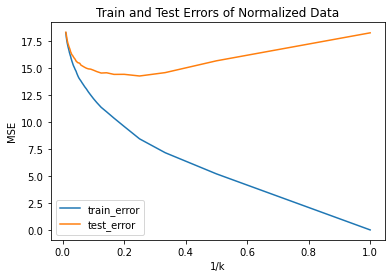

In [55]:
k_value=[1/K for K in range(1,101,1)]

plt.title("Train and Test Errors of Normalized Data")
plt.plot(k_value, error_train_norm, label='train_error')
plt.plot(k_value, error_test_norm, label='test_error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE') 

In [56]:
# knn regression using raw features
kcase = range(1,101,1)
error_test_raw = []
error_train_raw = []

for k in kcase:
    classifier_raw = KNeighborsRegressor(n_neighbors = k)
    classifier_raw.fit(X_train, y_train.values.ravel())
    #MSE
    y_pred_test_raw = classifier_raw.predict(X_test)
    error_test_raw.append(mean_squared_error(y_test, y_pred_test_raw))
    #MSE
    y_pred_train_raw = classifier_raw.predict(X_train)
    error_train_raw.append(mean_squared_error(y_train, y_pred_train_raw))
    #location of min test MSE
    position_test_raw = error_test_raw.index(min(error_test_raw))
    #location of min train MSE
    position_train_raw = error_train_raw.index(min(error_train_raw))

print('test MSE : \n', error_test_raw)
#location of the minimum test MSE:
print('location of min test MSE : \n', position_test_raw + 1)
#location of the minimum train MSE:
print('location of min train MSE : \n', position_train_raw + 1)
#minimum test MSE 
print('min test MSE when k=5: \n', min(error_test_raw))
#minimum train MSE
print('min train MSE when k=1: \n', min(error_train_raw))



test MSE : 
 [20.33254312086381, 17.344087408568438, 16.33884019892411, 15.810754571577844, 15.726819842563568, 15.794225175122872, 15.842648764207883, 15.990190370842042, 16.109829215526915, 16.335137953326367, 16.414284256068814, 16.482868285827628, 16.58231350229494, 16.71425301146582, 16.79296862881691, 16.90965532126219, 17.02722004907686, 17.134278452468493, 17.310480908232194, 17.373924801027517, 17.442466371905784, 17.498352922499436, 17.584079603478894, 17.64361780804937, 17.64833115870429, 17.76321398781738, 17.817518458842247, 17.89620781402164, 17.956317007915885, 18.0189451596811, 18.05177540861266, 18.11093370368556, 18.19286491682923, 18.244259173195985, 18.282016356073047, 18.34946447717383, 18.42528037270516, 18.450741642955485, 18.519293307350864, 18.533526079915532, 18.57559931203976, 18.69016159677154, 18.758736560623124, 18.782734520612237, 18.873408307700263, 18.94083746527593, 18.99112118842222, 19.042050526457103, 19.118495659926914, 19.157620111097188, 19.19662

In [57]:
print('According to the minimum test MSE we got above, when k=5 will best fit the model(raw data). ')
print('And the minimum test MSE when k=5 is 15.726819842563568')

According to the minimum test MSE we got above, when k=5 will best fit the model(raw data). 
And the minimum test MSE when k=5 is 15.726819842563568


Text(0, 0.5, 'MSE')

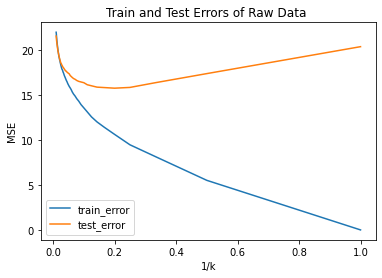

In [58]:
k_value=[1/K for K in range(1,101,1)]

plt.title("Train and Test Errors of Raw Data ")
plt.plot(k_value, error_train_raw, label='train_error')
plt.plot(k_value, error_test_raw, label='test_error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE')                       

(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [59]:
#minimum test MSE of KNN Regression of raw data
print('min test MSE of KNN Regression of raw data when k=5: \n', min(error_test_raw))
#minimum test MSE of KNN Regression of normalized data
print('min test MSE of KNN Regression of normalized data when k=4: \n', min(error_test_norm))

#min test MSE of polynomial after removal
print('min test MSE of polynomial after removal: \n', mean_squared_error(y_test, yh_new_test))

#min train MSE of polynomial after removal
print('min train MSE of polynomial after removal: \n', mean_squared_error(y_train, yh_new_train))


min test MSE of KNN Regression of raw data when k=5: 
 15.726819842563568
min test MSE of KNN Regression of normalized data when k=4: 
 14.291333431295715
min test MSE of polynomial after removal: 
 18.66004049509843
min train MSE of polynomial after removal: 
 17.890842773184744


2. ISLR: 2.4.1 (p.64)
(2.4.1). For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible    statistical learning method to be better or worse than an inflexible method. Justify your answer.

In general, the more flexible your model is, the less bias (in absolute value) and the more variance you’ll get when predicting on a test dataset.
But in general, fitting a more flexible model requires estimating a greater number of parameters.
These more complex models can lead to a phenomenon known as overfitting the data, which essentially means they follow the errors, or noise, too closely. 
In general, more flexible statistical methods have higher variance. 

(a) The sample size n is extremely large, and the number of predictors p is small.

Ans: A flexible method will fit better, using flexible model is less likely to be overfit with the large sample size n.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Ans: An inflexible method will fit better. Small observation size n will easily cause overfitting when using flexible method, since more flexible statistical methods have higher variance.

(c) The relationship between the predictors and response is highly non-linear.

Ans: A flexible method will fit better. A flexible method is not highly restrictive.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

Ans: An inflexible method will fit better. High variance of flexible method may lead to overfitting the noise.

3. ISLR: 2.4.7 (p.65)
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.


In [60]:
#create a dataframe
obs = [1,2,3,4,5,6]
X1 = [0, 2, 0, 0, -1,1]
X2 = [3, 0, 1, 1, 0, 1]
X3 = [0, 0, 3, 2, 1, 1]
y = ['Red','Red','Red', 'Green', 'Green','Red']

list_tuples = list(zip(obs, X1, X2, X3, y))
df3 = pd.DataFrame(list_tuples, columns = ['obs','X1','X2','X3','y'])
df3

,obs,X1,X2,X3,y
0,1,0,3,0,Red
1,2,2,0,0,Red
2,3,0,1,3,Red
3,4,0,1,2,Green
4,5,-1,0,1,Green
5,6,1,1,1,Red


(a)Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [61]:
#p1 = sqrt[(0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2] 
from scipy.spatial import distance
p1 = distance.euclidean([0, 0, 0], [0, 3, 0])
p2 = distance.euclidean([0, 0, 0], [2, 0, 0])
p3 = distance.euclidean([0, 0, 0], [0, 1, 3])
p4 = distance.euclidean([0, 0, 0], [0, 1, 2])
p5 = distance.euclidean([0, 0, 0], [-1, 0, 1])
p6 = distance.euclidean([0, 0, 0], [1, 1, 1])

print('Euclidean distance of obs1: \n', p1)
print('Euclidean distance of obs2: \n', p2)
print('Euclidean distance of obs3: \n', p3)
print('Euclidean distance of obs4: \n', p4)
print('Euclidean distance of obs5: \n', p5)
print('Euclidean distance of obs6: \n', p6)

Euclidean distance of obs1: 
 3.0
Euclidean distance of obs2: 
 2.0
Euclidean distance of obs3: 
 3.1622776601683795
Euclidean distance of obs4: 
 2.23606797749979
Euclidean distance of obs5: 
 1.4142135623730951
Euclidean distance of obs6: 
 1.7320508075688772


(b) What is our prediction with K = 1? Why?


Ans: Our test point is (X1,X2,X3)= (0,0,0). According to the euclidiean distance we calculated above in (a), the nearest neighbor of the test point is observation5, which is "Green", the test point will be "Green".

(c) What is our prediction with K = 3? Why?

Ans: Our test point is (X1,X2,X3)= (0,0,0). According to the euclidiean distance we calculated above in (a), the three      nearest neighbors of the test point are :
1. observation 5, which is "Green".  
2. observation 6, which is "Red".
3. observation 2, which is "Red".

   Using the majority polling decision, the test point will be "Red".                                    

 (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to     be large or small? Why?

Ans: Since the Bayes decision boundary is highly non-linear, we would expect k to be small. Small k has high variance and low bias, which would lead to overfit(not sommoth/non-linear). If k is large, more neighbors can help smoothen the decision boundary, since it will likely cause only a small shift in the position of the line.